# VISUALISING PROBLEMS ON BASIS OF VARIOUS FEATURES AND LABEL

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# evaluation of training dataset of various parmaters 

In [2]:
#importing training_dataset
training_dataset=pd.read_csv("train.csv",dtype='object')

In [3]:
#training_dataset
training_dataset

,id,blood_group,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,accepted
0,223723,O,Female,23,1,18.0,1,< 1 Year,No,29223.0,152.0,89,70,65,0
1,102674,AB-,Male,44,1,23.0,0,1-2 Year,Yes,28501.0,26.0,111,61,66,1
2,15567,AB+,Male,23,1,41.0,0,< 1 Year,Yes,32590.0,152.0,71,67,78,0
3,222937,O,Male,78,1,15.0,1,1-2 Year,No,2630.0,14.0,245,74,63,0
4,32565,B+,Female,25,1,44.0,1,< 1 Year,No,31821.0,152.0,59,73,62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266771,349992,O,Male,24,1,28.0,1,< 1 Year,No,49840.0,152.0,39,72,74,0
266772,260914,AB+,Male,41,1,14.0,0,1-2 Year,Yes,31399.0,26.0,25,63,75,0
266773,214966,AB+,Male,44,1,3.0,0,1-2 Year,Yes,21292.0,26.0,36,73,70,0
266774,200722,B+,Male,38,1,30.0,1,1-2 Year,Yes,29448.0,26.0,117,62,76,0


In [4]:
#number of missing values in each column
training_dataset.isna().sum()

id                      0
blood_group             0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
mother_age              0
father_age              0
accepted                0
dtype: int64

In [5]:
#size of training_dataset(number of samples,number of features)
training_dataset.columns

Index(['id', 'blood_group', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'mother_age', 'father_age',
       'accepted'],
      dtype='object')

In [6]:
training_dataset.describe()

,id,blood_group,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,accepted
count,266776,266776,266776,266776,266776,266776,266776,266776,266776,266776,266776,266776,266776,266776,266776
unique,266776,4,2,66,2,53,2,3,2,44880,152,290,20,20,2
top,233476,AB+,Male,24,1,28.0,0,1-2 Year,Yes,2630.0,152.0,256,79,78,0
freq,1,67112,144510,18182,266218,74601,144770,140489,134910,45387,94116,1009,13525,13561,234079


In [7]:
training_dataset['blood_group'].unique()

array(['O', 'AB-', 'AB+', 'B+'], dtype=object)

In [9]:
#plotting graph for categorical features
def plot_graph(dataset,feature_name,llist):
    freq=[]
    for i in llist:
        count=0
        for j in range(dataset.shape[0]):
            a=dataset[feature_name][int(j)]
            #print(a)
            if a==i:
                count+=1
        freq.append(count)
    print(llist)
    print(freq)
    plt.bar(llist,freq)
    plt.show()
    return sum(freq)

['O', 'AB-', 'AB+', 'B+']
[66638, 66542, 67112, 66484]


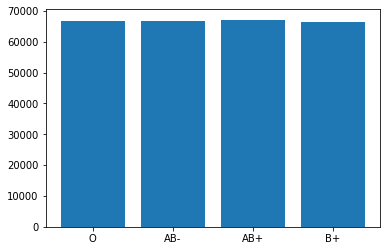

266776

In [10]:
plot_graph(training_dataset,'blood_group',['O', 'AB-', 'AB+', 'B+'])

['Male', 'Female']
[144510, 122266]


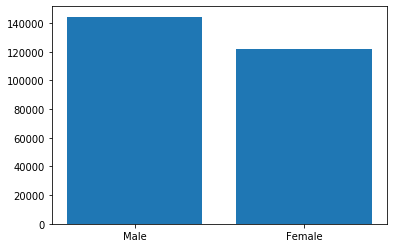

['0', '1']
[558, 266218]


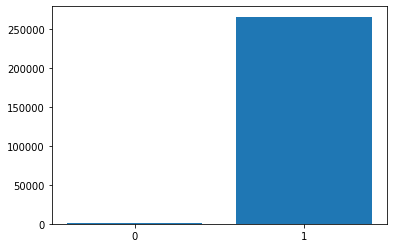

['0', '1']
[144770, 122006]


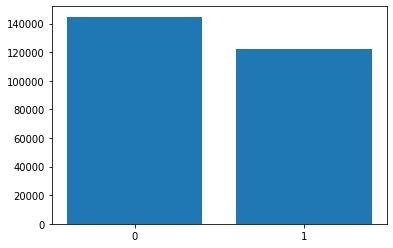

['Yes', 'No']
[134910, 131866]


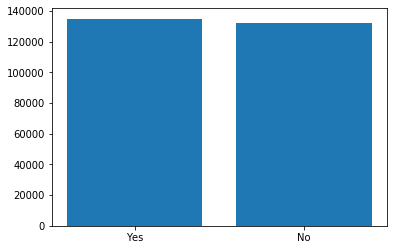

['0', '1']
[234079, 32697]


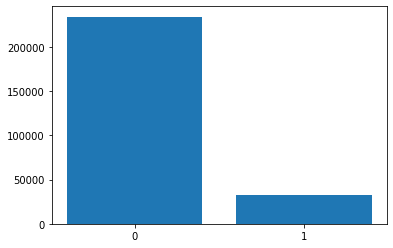

In [11]:
#plotting graph for categorical values
a=plot_graph(training_dataset,'Gender',['Male','Female'])
b=plot_graph(training_dataset,'Driving_License',['0','1'])   #must be removed see plot-2
c=plot_graph(training_dataset, 'Previously_Insured',['0','1'])
d=plot_graph(training_dataset, 'Vehicle_Damage',['Yes','No'])
e=plot_graph(training_dataset, 'accepted',['0','1'])

['< 1 Year', '1-2 Year', '> 2 Years']
[115089, 140489, 11198]


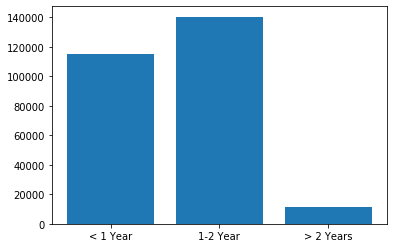

In [12]:
f=plot_graph(training_dataset,'Vehicle_Age',['< 1 Year', '1-2 Year', '> 2 Years'])

In [8]:
training_dataset

,id,blood_group,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,accepted
0,223723,O,Female,23,1,18.0,1,< 1 Year,No,29223.0,152.0,89,70,65,0
1,102674,AB-,Male,44,1,23.0,0,1-2 Year,Yes,28501.0,26.0,111,61,66,1
2,15567,AB+,Male,23,1,41.0,0,< 1 Year,Yes,32590.0,152.0,71,67,78,0
3,222937,O,Male,78,1,15.0,1,1-2 Year,No,2630.0,14.0,245,74,63,0
4,32565,B+,Female,25,1,44.0,1,< 1 Year,No,31821.0,152.0,59,73,62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266771,349992,O,Male,24,1,28.0,1,< 1 Year,No,49840.0,152.0,39,72,74,0
266772,260914,AB+,Male,41,1,14.0,0,1-2 Year,Yes,31399.0,26.0,25,63,75,0
266773,214966,AB+,Male,44,1,3.0,0,1-2 Year,Yes,21292.0,26.0,36,73,70,0
266774,200722,B+,Male,38,1,30.0,1,1-2 Year,Yes,29448.0,26.0,117,62,76,0


In [9]:
gender=pd.factorize(training_dataset['Gender'])
blood_gp=pd.factorize(training_dataset['blood_group'])
vehicle_age=pd.factorize(training_dataset['Vehicle_Age'])
vehicle_daamge=pd.factorize(training_dataset['Vehicle_Damage'])

In [15]:
train_set=training_dataset
train_set.drop(['Gender','blood_group','Vehicle_Age','Vehicle_Damage'],axis=1,inplace=True)

In [16]:
train_set['Gender']=gender[0]
train_set['blood_group']=blood_gp[0]
train_set['Vehicle_Age']=vehicle_age[0]
train_set['Vehicle_Damage']=vehicle_daamge[0]

In [17]:
train_set

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,accepted,Gender,blood_group,Vehicle_Age,Vehicle_Damage
0,223723,23,1,18.0,1,29223.0,152.0,89,70,65,0,0,0,0,0
1,102674,44,1,23.0,0,28501.0,26.0,111,61,66,1,1,1,1,1
2,15567,23,1,41.0,0,32590.0,152.0,71,67,78,0,1,2,0,1
3,222937,78,1,15.0,1,2630.0,14.0,245,74,63,0,1,0,1,0
4,32565,25,1,44.0,1,31821.0,152.0,59,73,62,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266771,349992,24,1,28.0,1,49840.0,152.0,39,72,74,0,1,0,0,0
266772,260914,41,1,14.0,0,31399.0,26.0,25,63,75,0,1,2,1,1
266773,214966,44,1,3.0,0,21292.0,26.0,36,73,70,0,1,2,1,1
266774,200722,38,1,30.0,1,29448.0,26.0,117,62,76,0,1,3,1,1


In [49]:
train_set.to_csv('Trained.csv',header=True,index=False)

In [10]:
#creating new dataset
df=pd.read_csv('Trained.csv',dtype='float64')

In [11]:
df

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,accepted,Gender,blood_group,Vehicle_Age,Vehicle_Damage
0,223723.0,23.0,1.0,18.0,1.0,29223.0,152.0,89.0,70.0,65.0,0.0,0.0,0.0,0.0,0.0
1,102674.0,44.0,1.0,23.0,0.0,28501.0,26.0,111.0,61.0,66.0,1.0,1.0,1.0,1.0,1.0
2,15567.0,23.0,1.0,41.0,0.0,32590.0,152.0,71.0,67.0,78.0,0.0,1.0,2.0,0.0,1.0
3,222937.0,78.0,1.0,15.0,1.0,2630.0,14.0,245.0,74.0,63.0,0.0,1.0,0.0,1.0,0.0
4,32565.0,25.0,1.0,44.0,1.0,31821.0,152.0,59.0,73.0,62.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266771,349992.0,24.0,1.0,28.0,1.0,49840.0,152.0,39.0,72.0,74.0,0.0,1.0,0.0,0.0,0.0
266772,260914.0,41.0,1.0,14.0,0.0,31399.0,26.0,25.0,63.0,75.0,0.0,1.0,2.0,1.0,1.0
266773,214966.0,44.0,1.0,3.0,0.0,21292.0,26.0,36.0,73.0,70.0,0.0,1.0,2.0,1.0,1.0
266774,200722.0,38.0,1.0,30.0,1.0,29448.0,26.0,117.0,62.0,76.0,0.0,1.0,3.0,1.0,1.0


In [12]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,accepted,Gender,blood_group,Vehicle_Age,Vehicle_Damage
count,266776.000000,266776.000000,266776.000000,266776.000000,266776.000000,266776.000000,266776.000000,266776.000000,266776.000000,266776.000000,266776.000000,266776.00000,266776.000000,266776.000000,266776.000000
mean,250168.281873,38.852311,0.997908,26.400156,0.457335,30551.832335,111.970844,154.321693,69.511643,69.506818,0.122563,0.54169,1.500202,0.610568,0.505705
std,144447.477712,15.517222,0.045687,13.227109,0.498177,17194.660980,54.222818,83.732094,5.770941,5.768211,0.327936,0.49826,1.117144,0.567209,0.499968
min,0.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,60.000000,60.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,125090.500000,25.000000,1.000000,15.000000,0.000000,24406.000000,26.000000,82.000000,65.000000,64.000000,0.000000,0.00000,1.000000,0.000000,0.000000
50%,250248.500000,36.000000,1.000000,28.000000,0.000000,31656.000000,128.000000,154.000000,70.000000,70.000000,0.000000,1.00000,2.000000,1.000000,1.000000
75%,375333.250000,49.000000,1.000000,35.000000,1.000000,39377.000000,152.000000,227.000000,75.000000,75.000000,0.000000,1.00000,2.000000,1.000000,1.000000
max,499999.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,79.000000,79.000000,1.000000,1.00000,3.000000,2.000000,1.000000


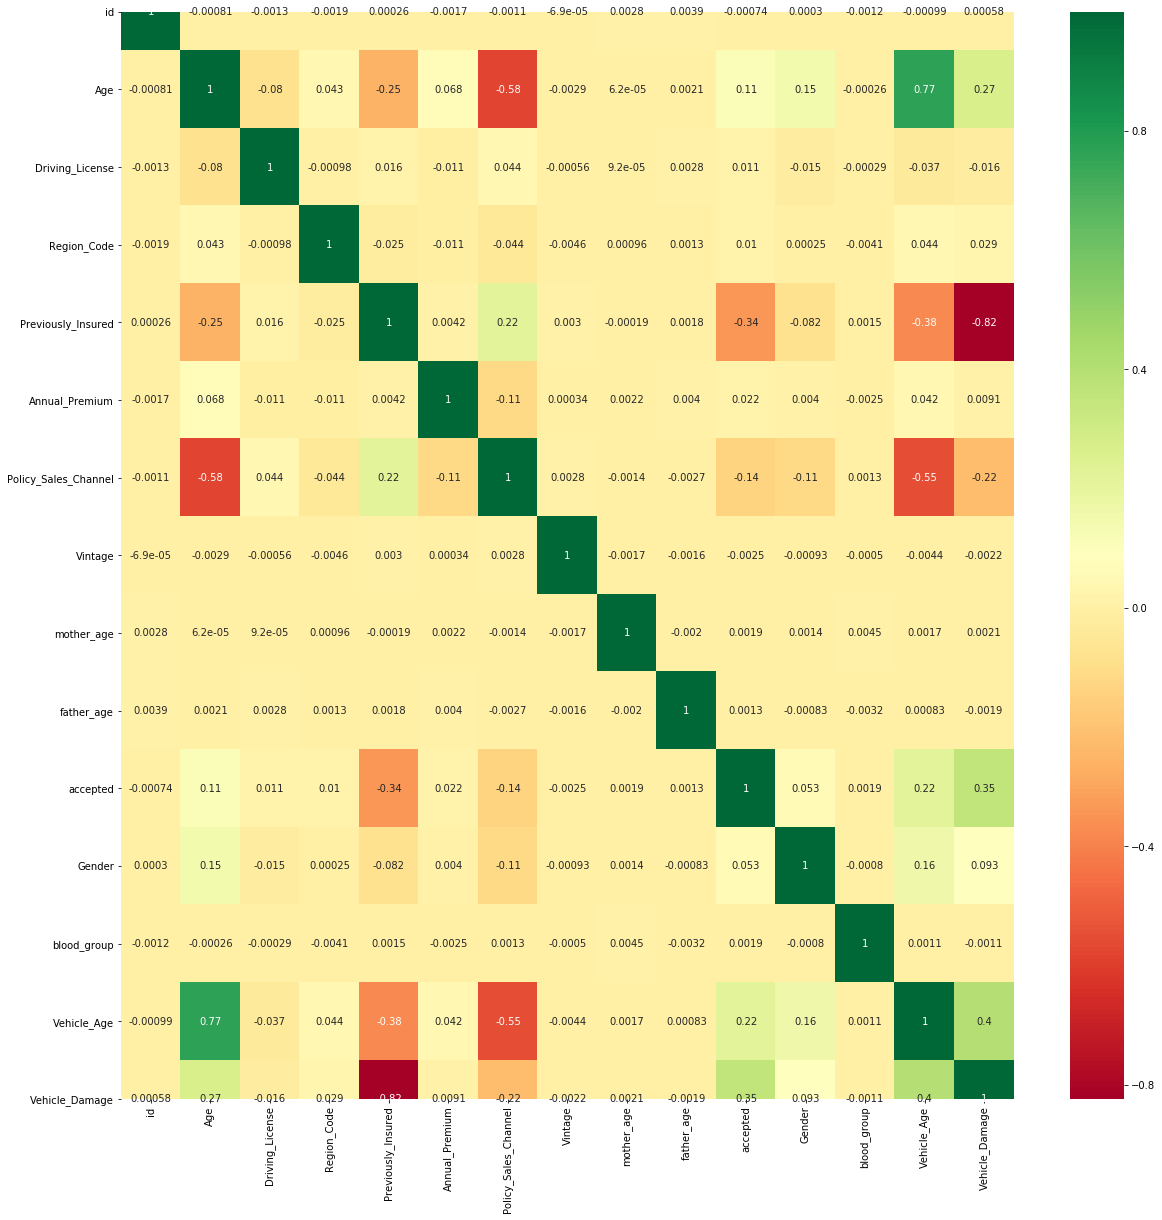

In [13]:
## Correlation
#get correlations of each features in new dataset of training_dataset
corrmat = df.corr()
top_corr_features = corrmat.index
top_corr_features
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [23]:
corrmat
#vehicle age <-> age
#vehicle_damage <-> previously insured
#accepted <-> vehicle_age vehicle_damage age previously_insured policy_sales_channel

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,accepted,Gender,blood_group,Vehicle_Age,Vehicle_Damage
id,1.000000,-0.000809,-0.001312,-0.001882,0.000260,-0.001662,-0.001124,-0.000069,0.002828,0.003900,-0.000739,0.000305,-0.001201,-0.000985,0.000576
Age,-0.000809,1.000000,-0.079669,0.043326,-0.254637,0.068293,-0.576971,-0.002893,0.000062,0.002090,0.111574,0.147454,-0.000257,0.765354,0.268865
Driving_License,-0.001312,-0.079669,1.000000,-0.000978,0.015513,-0.011183,0.043580,-0.000563,0.000092,0.002757,0.010606,-0.015271,-0.000285,-0.036785,-0.016216
Region_Code,-0.001882,0.043326,-0.000978,1.000000,-0.025257,-0.011242,-0.044069,-0.004598,0.000962,0.001274,0.009997,0.000249,-0.004112,0.044014,0.029034
Previously_Insured,0.000260,-0.254637,0.015513,-0.025257,1.000000,0.004190,0.218929,0.003001,-0.000194,0.001757,-0.340923,-0.081796,0.001477,-0.380551,-0.824184
Annual_Premium,-0.001662,0.068293,-0.011183,-0.011242,0.004190,1.000000,-0.111987,0.000336,0.002199,0.004025,0.021531,0.004026,-0.002468,0.041533,0.009121
Policy_Sales_Channel,-0.001124,-0.576971,0.043580,-0.044069,0.218929,-0.111987,1.000000,0.002825,-0.001427,-0.002749,-0.138121,-0.112339,0.001265,-0.549396,-0.223996
Vintage,-0.000069,-0.002893,-0.000563,-0.004598,0.003001,0.000336,0.002825,1.000000,-0.001718,-0.001638,-0.002498,-0.000928,-0.000497,-0.004399,-0.002226
mother_age,0.002828,0.000062,0.000092,0.000962,-0.000194,0.002199,-0.001427,-0.001718,1.000000,-0.002038,0.001895,0.001439,0.004501,0.001713,0.002119
father_age,0.003900,0.002090,0.002757,0.001274,0.001757,0.004025,-0.002749,-0.001638,-0.002038,1.000000,0.001281,-0.000833,-0.003212,0.000830,-0.001913


In [156]:
df_t=pd.read_csv('Tested.csv',dtype='float64')

In [157]:
df_t

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,Gender,blood_group,Vehicle_Age,Vehicle_Damage
0,485035.0,21.0,1.0,8.0,0.0,43500.0,157.0,266.0,64.0,62.0,0.0,0.0,0.0,0.0
1,278306.0,53.0,1.0,2.0,0.0,33547.0,26.0,119.0,76.0,79.0,1.0,1.0,0.0,0.0
2,478061.0,23.0,1.0,30.0,1.0,41650.0,152.0,84.0,61.0,77.0,0.0,2.0,1.0,1.0
3,109822.0,46.0,1.0,28.0,0.0,39209.0,37.0,299.0,70.0,70.0,0.0,3.0,0.0,0.0
4,272343.0,30.0,1.0,28.0,0.0,43252.0,26.0,215.0,73.0,62.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114328,163857.0,20.0,1.0,35.0,1.0,22475.0,160.0,101.0,62.0,78.0,0.0,2.0,1.0,1.0
114329,17727.0,21.0,1.0,33.0,1.0,43046.0,152.0,93.0,78.0,63.0,0.0,2.0,1.0,1.0
114330,29700.0,21.0,1.0,37.0,0.0,34579.0,160.0,283.0,68.0,77.0,0.0,0.0,1.0,0.0
114331,154474.0,66.0,1.0,28.0,0.0,77603.0,124.0,122.0,60.0,77.0,1.0,0.0,2.0,0.0


Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'mother_age',
       'father_age', 'Gender', 'blood_group', 'Vehicle_Age', 'Vehicle_Damage'],
      dtype='object')


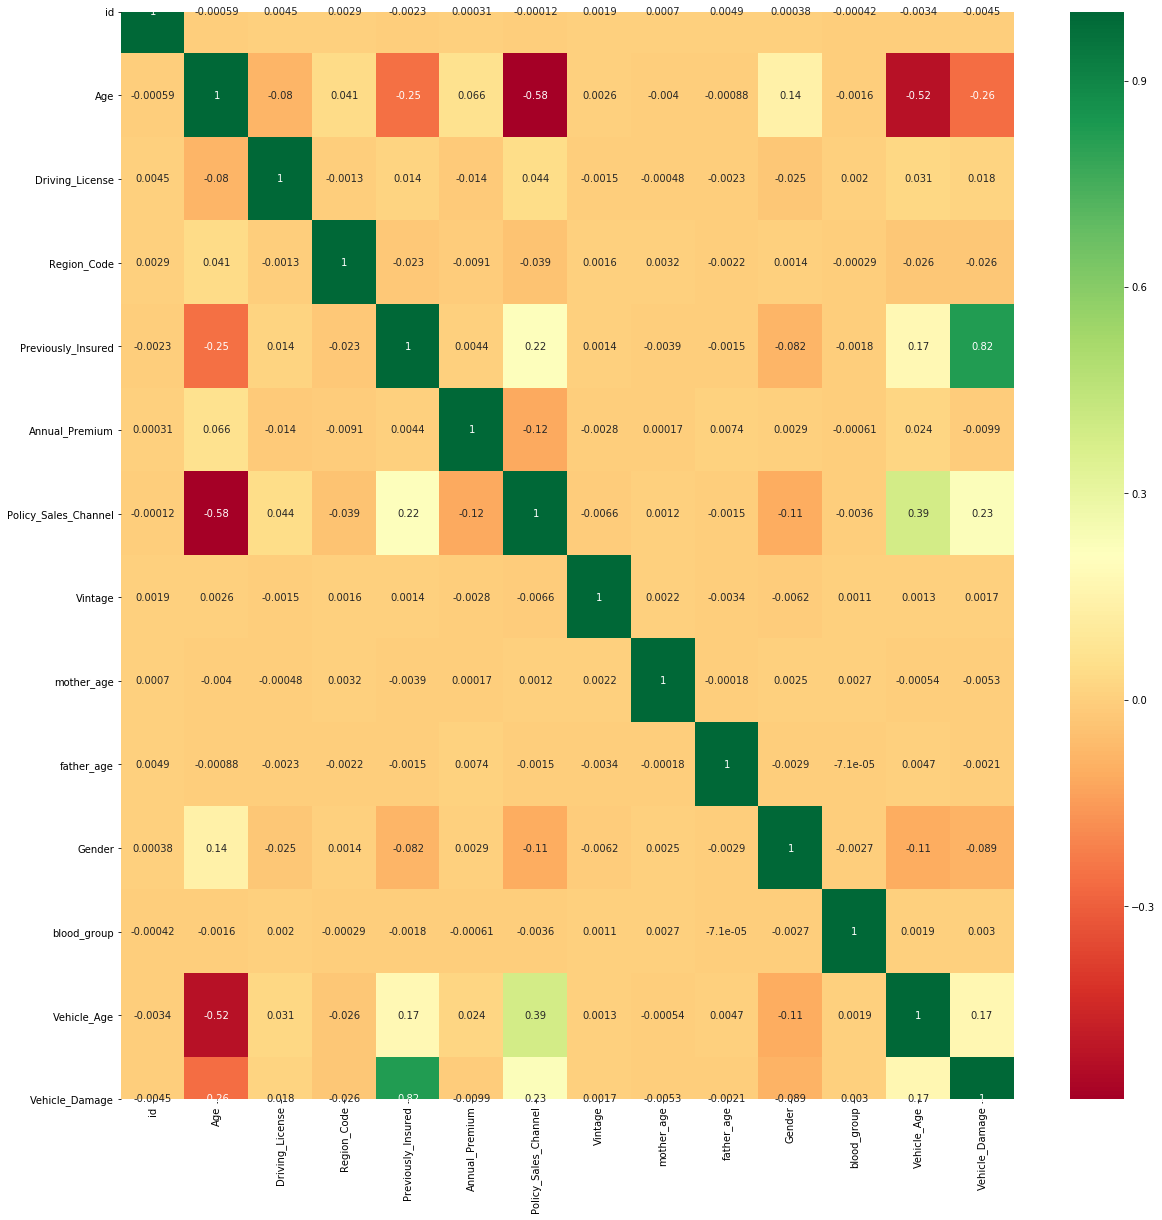

In [26]:
## Correlation
#get correlations of each features in new dataset of training_dataset
corrmat_t = df_t.corr()
top_corr_features_t = corrmat_t.index
print(top_corr_features_t)
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(df_t[top_corr_features_t].corr(),annot=True,cmap="RdYlGn")

In [27]:
corrmat_t

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,Gender,blood_group,Vehicle_Age,Vehicle_Damage
id,1.000000,-0.000591,0.004496,0.002889,-0.002309,0.000309,-0.000116,0.001939,0.000699,0.004891,0.000376,-0.000421,-0.003350,-0.004494
Age,-0.000591,1.000000,-0.080079,0.040807,-0.254769,0.065690,-0.579818,0.002555,-0.004005,-0.000878,0.141063,-0.001569,-0.521491,-0.264408
Driving_License,0.004496,-0.080079,1.000000,-0.001319,0.013755,-0.013536,0.044095,-0.001494,-0.000478,-0.002256,-0.025414,0.001984,0.030796,0.017557
Region_Code,0.002889,0.040807,-0.001319,1.000000,-0.023253,-0.009061,-0.038564,0.001572,0.003183,-0.002203,0.001419,-0.000288,-0.026299,-0.026362
Previously_Insured,-0.002309,-0.254769,0.013755,-0.023253,1.000000,0.004443,0.220424,0.001448,-0.003907,-0.001457,-0.082226,-0.001752,0.174932,0.824043
Annual_Premium,0.000309,0.065690,-0.013536,-0.009061,0.004443,1.000000,-0.116187,-0.002811,0.000172,0.007380,0.002862,-0.000606,0.023848,-0.009890
Policy_Sales_Channel,-0.000116,-0.579818,0.044095,-0.038564,0.220424,-0.116187,1.000000,-0.006612,0.001171,-0.001470,-0.108387,-0.003563,0.387684,0.225254
Vintage,0.001939,0.002555,-0.001494,0.001572,0.001448,-0.002811,-0.006612,1.000000,0.002161,-0.003387,-0.006228,0.001146,0.001281,0.001681
mother_age,0.000699,-0.004005,-0.000478,0.003183,-0.003907,0.000172,0.001171,0.002161,1.000000,-0.000184,0.002504,0.002669,-0.000544,-0.005335
father_age,0.004891,-0.000878,-0.002256,-0.002203,-0.001457,0.007380,-0.001470,-0.003387,-0.000184,1.000000,-0.002931,-0.000071,0.004650,-0.002103


# Plotting between features and label of training set

In [28]:
df

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,accepted,Gender,blood_group,Vehicle_Age,Vehicle_Damage
0,223723.0,23.0,1.0,18.0,1.0,29223.0,152.0,89.0,70.0,65.0,0.0,0.0,0.0,0.0,0.0
1,102674.0,44.0,1.0,23.0,0.0,28501.0,26.0,111.0,61.0,66.0,1.0,1.0,1.0,1.0,1.0
2,15567.0,23.0,1.0,41.0,0.0,32590.0,152.0,71.0,67.0,78.0,0.0,1.0,2.0,0.0,1.0
3,222937.0,78.0,1.0,15.0,1.0,2630.0,14.0,245.0,74.0,63.0,0.0,1.0,0.0,1.0,0.0
4,32565.0,25.0,1.0,44.0,1.0,31821.0,152.0,59.0,73.0,62.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266771,349992.0,24.0,1.0,28.0,1.0,49840.0,152.0,39.0,72.0,74.0,0.0,1.0,0.0,0.0,0.0
266772,260914.0,41.0,1.0,14.0,0.0,31399.0,26.0,25.0,63.0,75.0,0.0,1.0,2.0,1.0,1.0
266773,214966.0,44.0,1.0,3.0,0.0,21292.0,26.0,36.0,73.0,70.0,0.0,1.0,2.0,1.0,1.0
266774,200722.0,38.0,1.0,30.0,1.0,29448.0,26.0,117.0,62.0,76.0,0.0,1.0,3.0,1.0,1.0


In [29]:
dl_accepted=0
dln_accepted=0
dl_rejected=0
dln_rejected=0
for i in range(df.shape[0]):
    if(df['Driving_License'][i]==0):
        if(df['accepted'][i]==1):
            dln_accepted+=1
        else:
            dln_rejected+=1
    if(df['Driving_License'][i]==1):
        if(df['accepted'][i]==1):
            dl_accepted+=1
        else:
            dl_rejected+=1

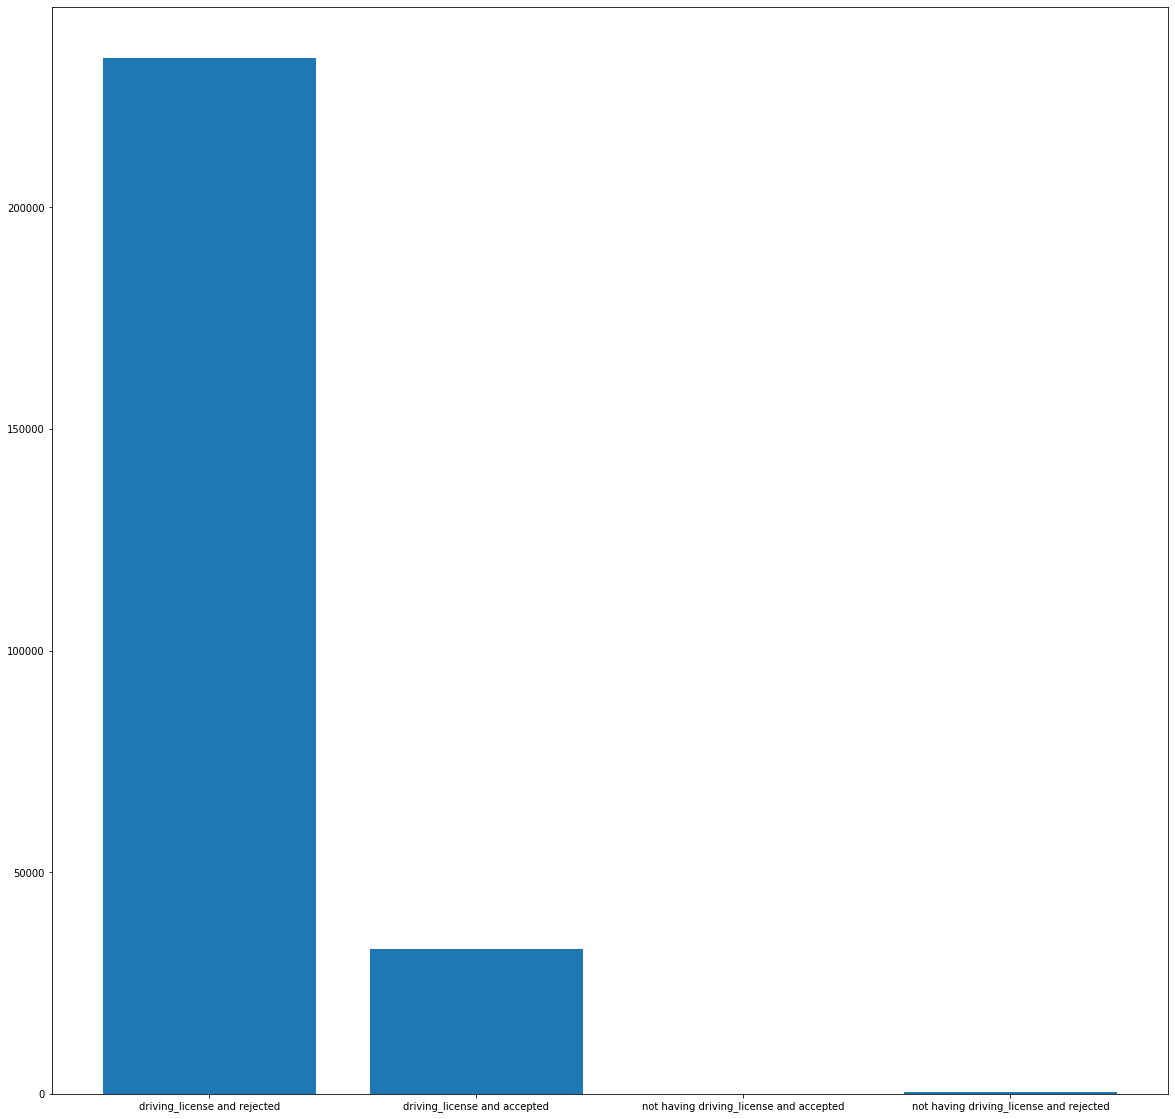

In [30]:
plt.figure(figsize=(20,20))
plt.bar(['driving_license and rejected','driving_license and accepted','not having driving_license and accepted','not having driving_license and rejected'],[dl_rejected,dl_accepted,dln_accepted,dln_rejected])
plt.show()

In [156]:
[dl_rejected,dl_accepted,dln_accepted,dln_rejected]

[233547, 32671, 26, 532]

In [32]:
pa=0
pr=0
npa=0
npr=0
for i in range(df.shape[0]):
    if(df['Previously_Insured'][i]==0):
        if(df['accepted'][i]==1):
            npa+=1
        else:
            npr+=1
    if(df['Previously_Insured'][i]==1):
        if(df['accepted'][i]==1):
            pa+=1
        else:
            pr+=1

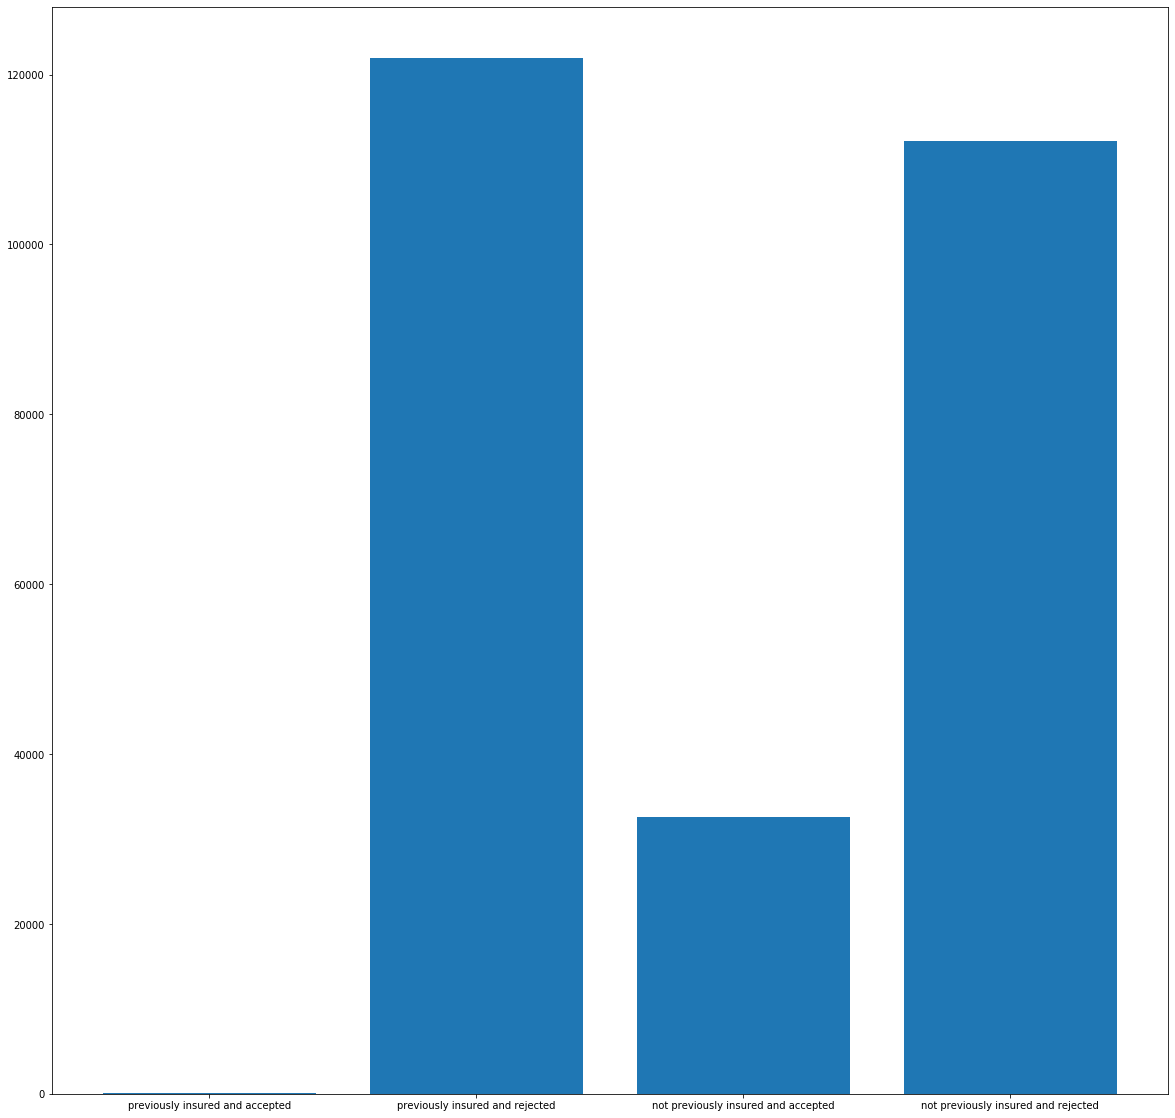

In [33]:
plt.figure(figsize=(20,20))
plt.bar(['previously insured and accepted','previously insured and rejected','not previously insured and accepted','not previously insured and rejected'],[pa,pr,npa,npr])
plt.show()

In [34]:
[pa,pr,npa,npr]

[95, 121911, 32602, 112168]

In [36]:
male_accepted=0
male_rejected=0
female_accepted=0
female_rejected=0
for i in range(df.shape[0]):
    if(df['Gender'][i]==0):
        if(df['accepted'][i]==1):
            female_accepted+=1
        else:
            female_rejected+=1
    if(df['Gender'][i]==1):
        if(df['accepted'][i]==1):
            male_accepted+=1
        else:
            male_rejected+=1

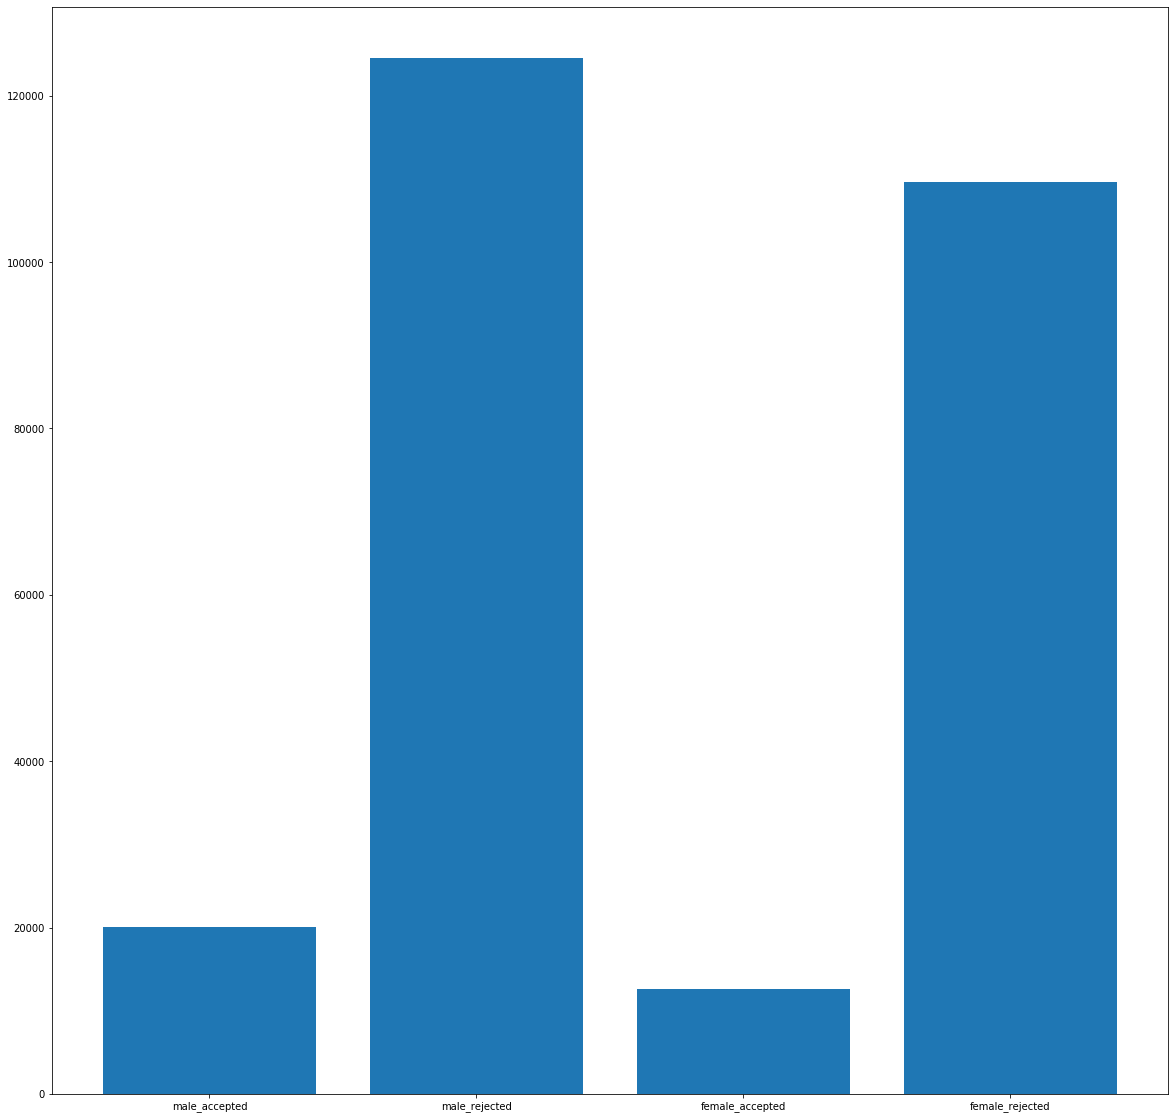

In [37]:
plt.figure(figsize=(20,20))
plt.bar(['male_accepted','male_rejected','female_accepted','female_rejected'],[male_accepted,male_rejected,female_accepted,female_rejected])
plt.show()

In [38]:
(male_accepted,male_rejected,female_accepted,female_rejected)

(20030, 124480, 12667, 109599)

In [39]:
vnd_accepted=0
vnd_rejected=0
vd_accepted=0
vd_rejected=0
for i in range(df.shape[0]):
    if(df['Vehicle_Damage'][i]==0):
        if(df['accepted'][i]==1):
            vnd_accepted+=1
        else:
            vnd_rejected+=1
    if(df['Vehicle_Damage'][i]==1):
        if(df['accepted'][i]==1):
            vd_accepted+=1
        else:
            vd_rejected+=1

In [40]:
(vd_accepted,vd_rejected,vnd_accepted,vnd_rejected)

(32029, 102881, 668, 131198)

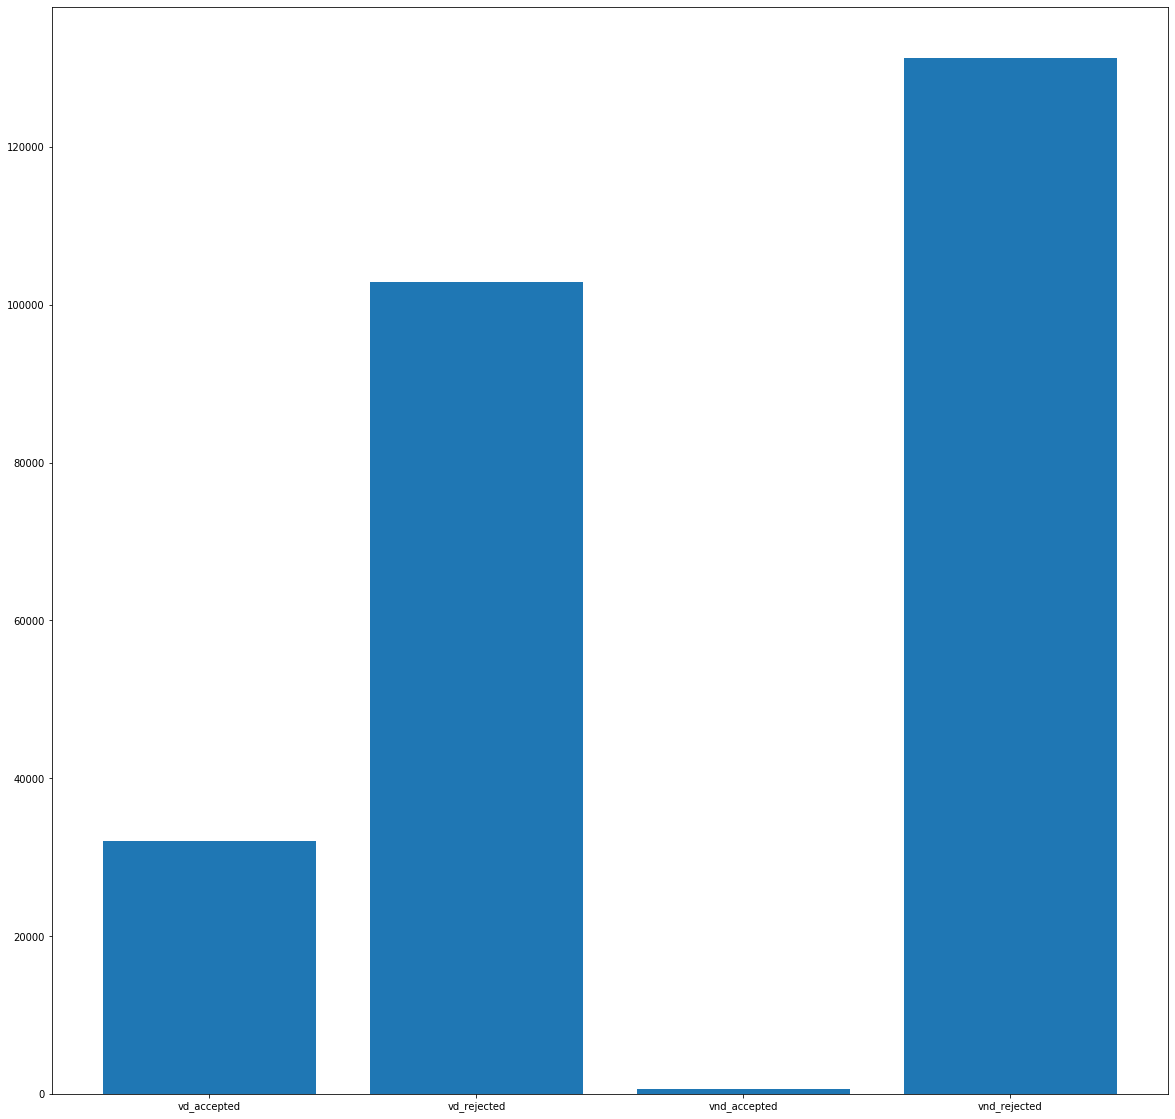

In [41]:
plt.figure(figsize=(20,20))
plt.bar(['vd_accepted','vd_rejected','vnd_accepted','vnd_rejected'],[vd_accepted,vd_rejected,vnd_accepted,vnd_rejected])
plt.show()

In [46]:
male_vnd_accepted=0
male_vnd_rejected=0
female_vnd_accepted=0
female_vnd_rejected=0
male_vd_accepted=0
male_vd_rejected=0
female_vd_accepted=0
female_vd_rejected=0
for i in range(df.shape[0]):
    if(df['Vehicle_Damage'][i]==0):
        if(df['accepted'][i]==1):
            if(df['Gender'][i]==0):
                female_vnd_accepted+=1
            else:
                male_vnd_accepted+=1
        else:
            if(df['Gender'][i]==0):
                female_vnd_rejected+=1
            else:
                male_vnd_rejected+=1
    if(df['Vehicle_Damage'][i]==1):
        if(df['accepted'][i]==1):
            if(df['Gender'][i]==0):
                female_vd_accepted+=1
            else:
                male_vd_accepted+=1
        else:
            if(df['Gender'][i]==0):
                female_vd_rejected+=1
            else:
                male_vd_rejected+=1

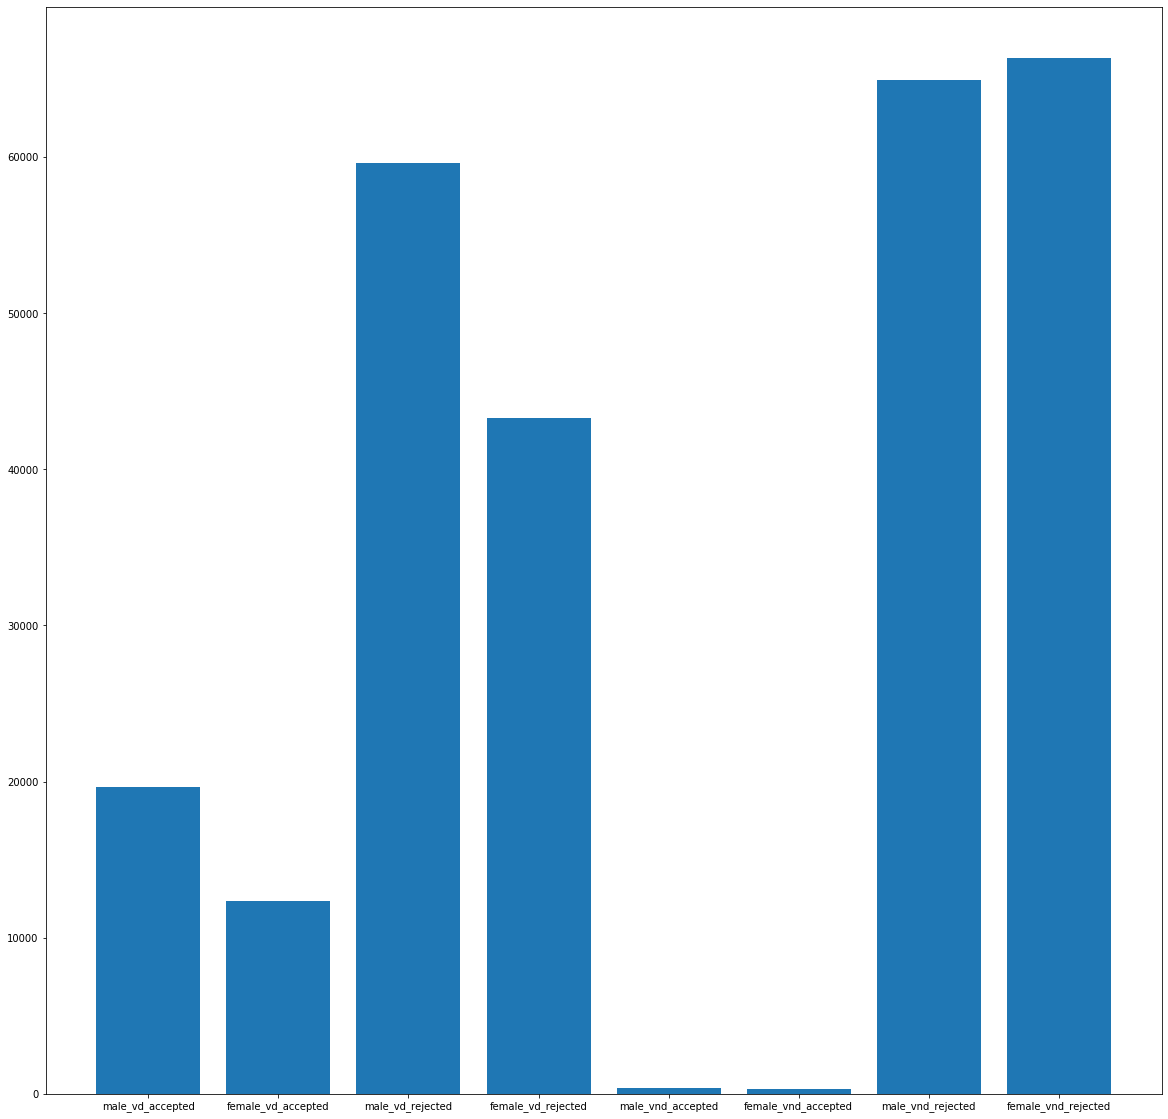

In [65]:
plt.figure(figsize=(20,20))
plt.bar(['male_vd_accepted','female_vd_accepted','male_vd_rejected','female_vd_rejected','male_vnd_accepted','female_vnd_accepted','male_vnd_rejected','female_vnd_rejected'],[male_vd_accepted,female_vd_accepted,male_vd_rejected,female_vd_rejected,male_vnd_accepted,female_vnd_accepted,male_vnd_rejected,female_vnd_rejected])
plt.show()

In [42]:
blood_gp

(array([0, 1, 2, ..., 2, 3, 0], dtype=int64),
 Index(['O', 'AB-', 'AB+', 'B+'], dtype='object'))

In [43]:
o_accepted=0
o_rejected=0
abp_accepted=0
abp_rejected=0
abn_accepted=0
abn_rejected=0
bp_accepted=0
bp_rejected=0
for i in range(df.shape[0]):
    if(df['blood_group'][i]==0):
        if(df['accepted'][i]==1):
            o_accepted+=1
        else:
            o_rejected+=1
    if(df['blood_group'][i]==1):
        if(df['accepted'][i]==1):
            abn_accepted+=1
        else:
            abn_rejected+=1
    if(df['blood_group'][i]==2):
        if(df['accepted'][i]==1):
            abp_accepted+=1
        else:
            abp_rejected+=1
    if(df['blood_group'][i]==3):
        if(df['accepted'][i]==1):
            bp_accepted+=1
        else:
            bp_rejected+=1

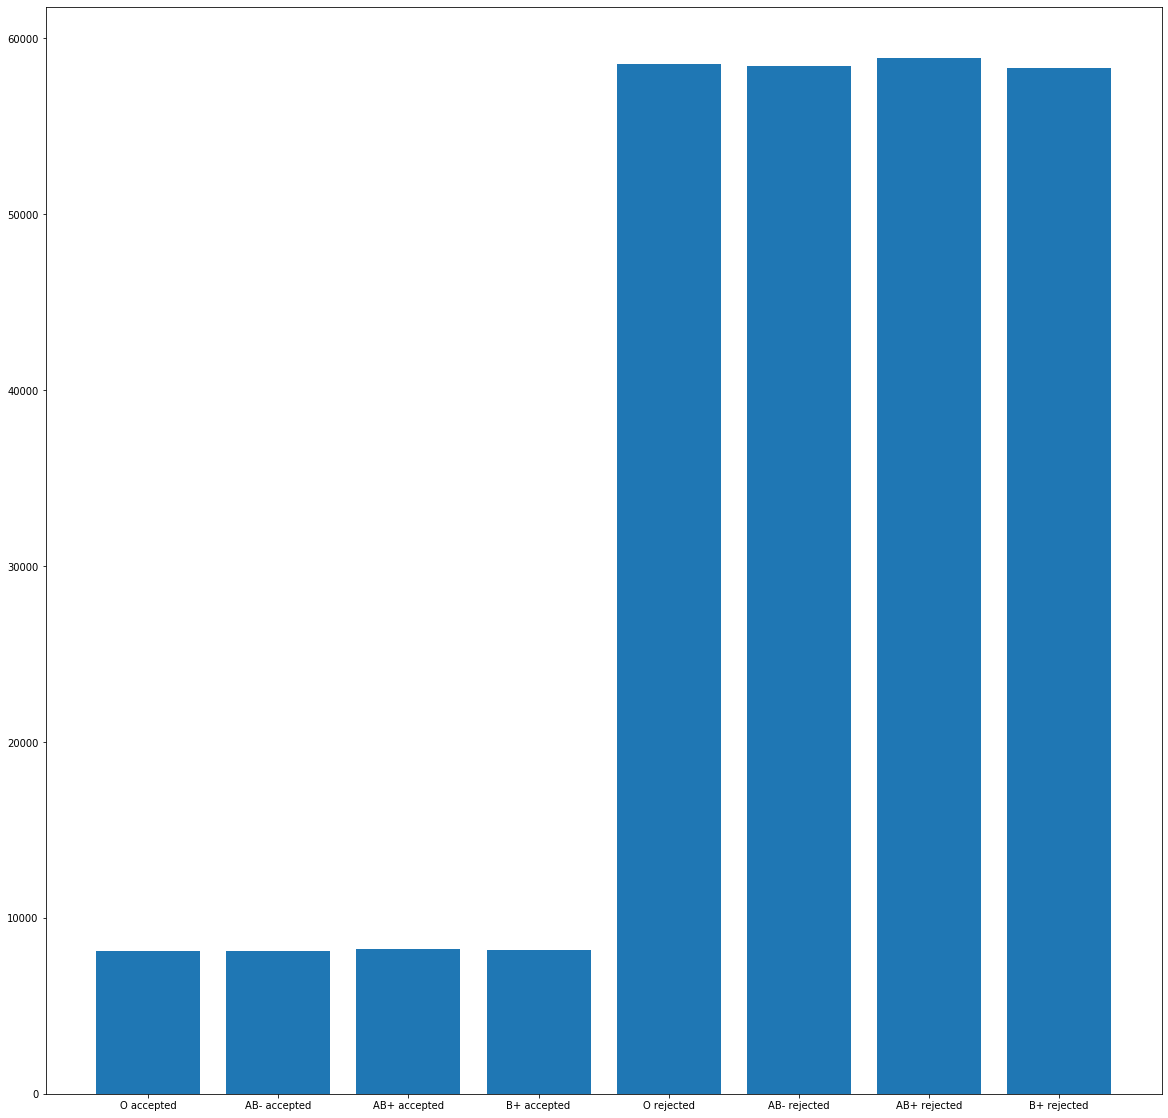

In [44]:
plt.figure(figsize=(20,20))
plt.bar(['O accepted', 'AB- accepted', 'AB+ accepted', 'B+ accepted','O rejected', 'AB- rejected', 'AB+ rejected', 'B+ rejected'],[o_accepted,abn_accepted,abp_accepted,bp_accepted,o_rejected,abn_rejected,abp_rejected,bp_rejected])
plt.show()

In [45]:
[o_accepted,abn_accepted,abp_accepted,bp_accepted,o_rejected,abn_rejected,abp_rejected,bp_rejected]

[8114, 8129, 8257, 8197, 58524, 58413, 58855, 58287]

In [46]:
vehicle_age

(array([0, 1, 0, ..., 1, 1, 1], dtype=int64),
 Index(['< 1 Year', '1-2 Year', '> 2 Years'], dtype='object'))

In [47]:
lone_accepted=0
lone_rejected=0
gtwo_accepted=0
gtwo_rejected=0
m_accepted=0
m_rejected=0
for i in range(df.shape[0]):
    if(df['Vehicle_Age'][i]==0):
        if(df['accepted'][i]==1):
            lone_accepted+=1
        else:
            lone_rejected+=1
    if(df['Vehicle_Age'][i]==1):
        if(df['accepted'][i]==1):
            m_accepted+=1
        else:
            m_rejected+=1
    if(df['Vehicle_Age'][i]==2):
        if(df['accepted'][i]==1):
            gtwo_accepted+=1
        else:
            gtwo_rejected+=1

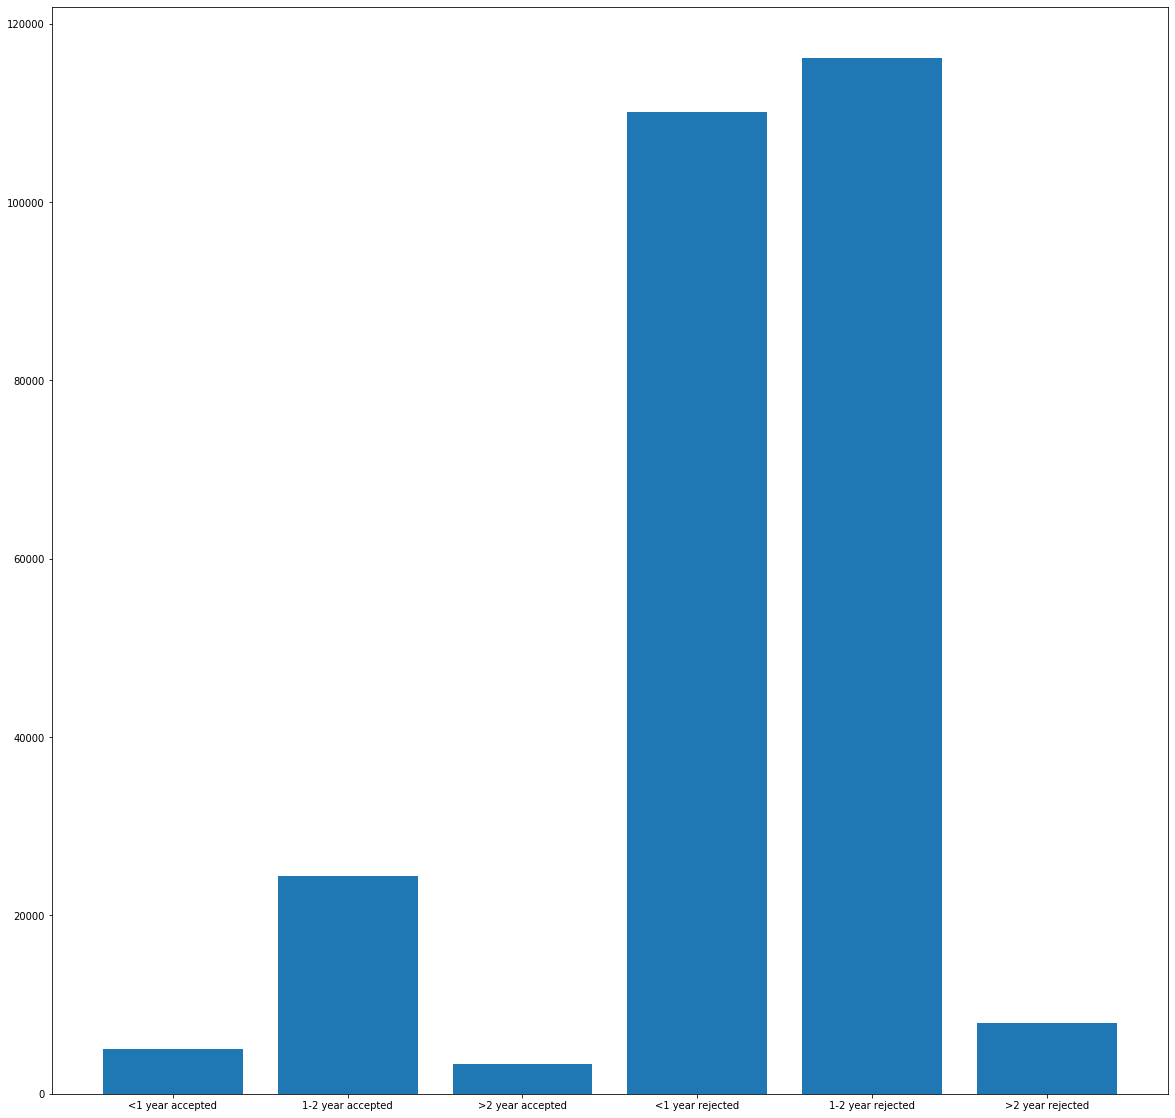

In [48]:
plt.figure(figsize=(20,20))
plt.bar(['<1 year accepted', '1-2 year accepted', '>2 year accepted','<1 year rejected', '1-2 year rejected', '>2 year rejected'],[lone_accepted,m_accepted,gtwo_accepted,lone_rejected,m_rejected,gtwo_rejected])
plt.show()

In [49]:
[lone_accepted,m_accepted,gtwo_accepted,lone_rejected,m_rejected,gtwo_rejected]

[4998, 24392, 3307, 110091, 116097, 7891]

In [122]:
df.columns

Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'mother_age',
       'father_age', 'accepted', 'Gender', 'blood_group', 'Vehicle_Age',
       'Vehicle_Damage'],
      dtype='object')

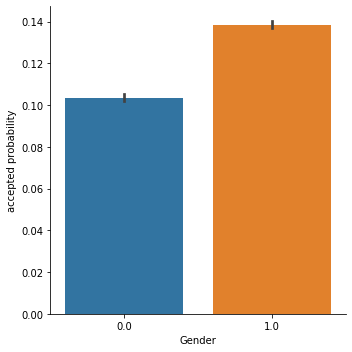

In [128]:
g = sns.factorplot(x="Gender",y="accepted",data=df,kind="bar")
g = g.set_ylabels("accepted probability")

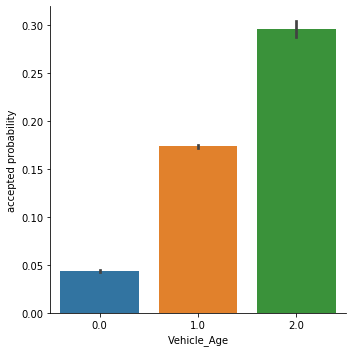

In [129]:
g = sns.factorplot(x="Vehicle_Age",y="accepted",data=df,kind="bar")
g = g.set_ylabels("accepted probability")

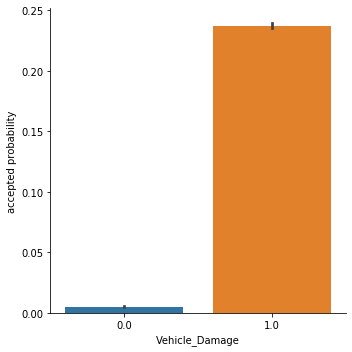

In [130]:
g = sns.factorplot(x="Vehicle_Damage",y="accepted",data=df,kind="bar")
g = g.set_ylabels("accepted probability")

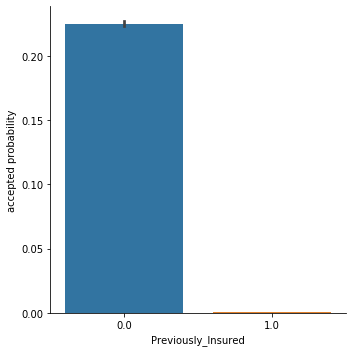

In [131]:
g = sns.factorplot(x="Previously_Insured",y="accepted",data=df,kind="bar")
g = g.set_ylabels("accepted probability")

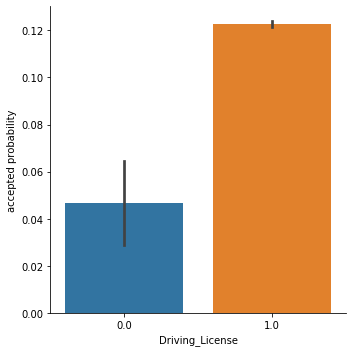

In [132]:
g = sns.factorplot(x="Driving_License",y="accepted",data=df,kind="bar")
g = g.set_ylabels("accepted probability")

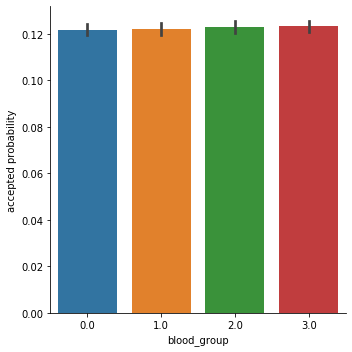

In [134]:
g = sns.factorplot(x="blood_group",y="accepted",data=df,kind="bar")
g = g.set_ylabels("accepted probability")

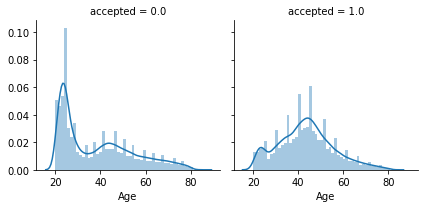

In [115]:
# Explore Age vs Accepted
g = sns.FacetGrid(df, col='accepted')
g = g.map(sns.distplot, "Age")

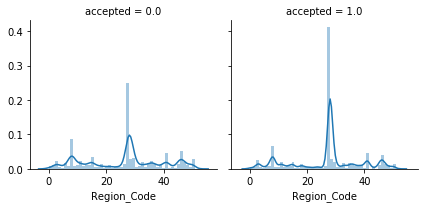

In [117]:
# Explore Age vs Accepted
g = sns.FacetGrid(df, col='accepted')
g = g.map(sns.distplot, 'Region_Code')

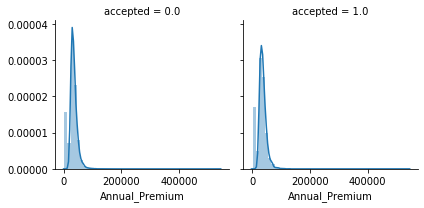

In [118]:
# Explore Age vs Accepted
g = sns.FacetGrid(df, col='accepted')
g = g.map(sns.distplot, 'Annual_Premium')

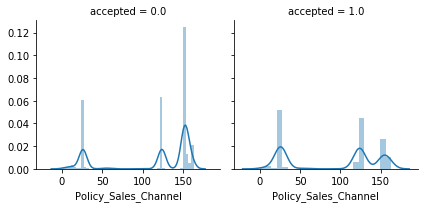

In [120]:
# Explore Age vs Accepted
g = sns.FacetGrid(df, col='accepted')
g = g.map(sns.distplot, 'Policy_Sales_Channel')

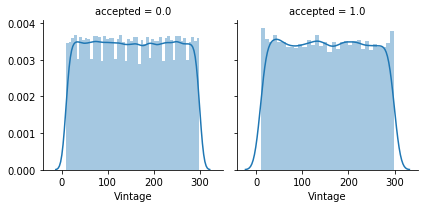

In [123]:
# Explore Age vs Accepted
g = sns.FacetGrid(df, col='accepted')
g = g.map(sns.distplot, 'Vintage')

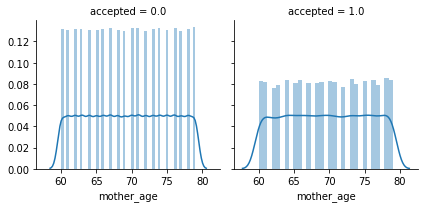

In [124]:
# Explore Age vs Accepted
g = sns.FacetGrid(df, col='accepted')
g = g.map(sns.distplot, 'mother_age')

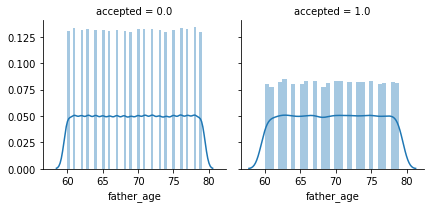

In [125]:
# Explore Age vs Accepted
g = sns.FacetGrid(df, col='accepted')
g = g.map(sns.distplot, 'father_age')

# splitting training set

# splitting dataset w.r.t accepted feature

In [121]:
train_new_ones

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,accepted,Gender,blood_group,Vehicle_Age,Vehicle_Damage
1,102674.0,44.0,1.0,23.0,0.0,28501.0,26.0,111.0,61.0,66.0,1.0,1.0,1.0,1.0,1.0
30,119827.0,38.0,1.0,8.0,0.0,43553.0,156.0,18.0,77.0,62.0,1.0,1.0,0.0,1.0,1.0
32,451895.0,25.0,1.0,37.0,0.0,27499.0,152.0,206.0,66.0,73.0,1.0,1.0,0.0,0.0,1.0
44,135886.0,40.0,1.0,45.0,0.0,2630.0,156.0,248.0,66.0,74.0,1.0,1.0,3.0,1.0,1.0
58,77008.0,47.0,1.0,28.0,0.0,45896.0,26.0,172.0,63.0,76.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266721,110299.0,45.0,1.0,28.0,0.0,34241.0,26.0,238.0,62.0,71.0,1.0,0.0,0.0,1.0,1.0
266741,486444.0,46.0,1.0,28.0,0.0,41766.0,26.0,235.0,64.0,75.0,1.0,1.0,2.0,2.0,1.0
266742,324229.0,42.0,1.0,17.0,0.0,17421.0,124.0,247.0,78.0,61.0,1.0,0.0,1.0,1.0,1.0
266752,472875.0,23.0,1.0,11.0,0.0,24174.0,124.0,121.0,65.0,73.0,1.0,1.0,2.0,1.0,1.0


In [122]:
train_new_zeros

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,accepted,Gender,blood_group,Vehicle_Age,Vehicle_Damage
0,223723.0,23.0,1.0,18.0,1.0,29223.0,152.0,89.0,70.0,65.0,0.0,0.0,0.0,0.0,0.0
2,15567.0,23.0,1.0,41.0,0.0,32590.0,152.0,71.0,67.0,78.0,0.0,1.0,2.0,0.0,1.0
3,222937.0,78.0,1.0,15.0,1.0,2630.0,14.0,245.0,74.0,63.0,0.0,1.0,0.0,1.0,0.0
4,32565.0,25.0,1.0,44.0,1.0,31821.0,152.0,59.0,73.0,62.0,0.0,0.0,3.0,0.0,0.0
5,213918.0,67.0,1.0,8.0,0.0,36756.0,124.0,258.0,73.0,70.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266771,349992.0,24.0,1.0,28.0,1.0,49840.0,152.0,39.0,72.0,74.0,0.0,1.0,0.0,0.0,0.0
266772,260914.0,41.0,1.0,14.0,0.0,31399.0,26.0,25.0,63.0,75.0,0.0,1.0,2.0,1.0,1.0
266773,214966.0,44.0,1.0,3.0,0.0,21292.0,26.0,36.0,73.0,70.0,0.0,1.0,2.0,1.0,1.0
266774,200722.0,38.0,1.0,30.0,1.0,29448.0,26.0,117.0,62.0,76.0,0.0,1.0,3.0,1.0,1.0


In [110]:
list_zeros=list()
for i in range(df.shape[0]):
    if(df['accepted'][i]==0):
        list_zeros.append(i)

In [113]:
train_new_ones=train_ones.drop(list_zeros,axis=0,inplace=False)

In [117]:
list_ones=list()
for i in range(df.shape[0]):
    if(df['accepted'][i]==1):
        list_ones.append(i)

In [120]:
train_new_zeros=train_zeros.drop(list_ones,axis=0,inplace=False)

In [124]:
X=train_new_ones.iloc[:,[1,3,4,5,6,7,11,12,13,14]]
Y=train_new_ones.iloc[:,10]

st=pd.get_dummies(X['Vehicle_Age'],drop_first=True)
g=pd.get_dummies(X['blood_group'],drop_first=True)

X=X.drop(['blood_group','Vehicle_Age'],axis=1)

X=pd.concat([X,g,st],axis=1)
#splitting of train set into training set and validation set
from sklearn.model_selection import train_test_split 
x_train_one,x_test_one,y_train_one,y_test_one=train_test_split(X,Y,test_size=0.05,random_state=0)

In [129]:
x_train_one

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender,Vehicle_Damage,1.0,2.0,3.0,1.0,2.0
160581,67.0,28.0,0.0,34516.0,26.0,51.0,0.0,1.0,0,1,0,1,0
129720,56.0,30.0,0.0,2630.0,156.0,185.0,1.0,1.0,0,0,0,1,0
41407,55.0,19.0,0.0,36239.0,26.0,167.0,1.0,1.0,1,0,0,1,0
120635,46.0,28.0,0.0,69856.0,26.0,244.0,0.0,1.0,1,0,0,1,0
40810,33.0,28.0,0.0,2630.0,156.0,85.0,0.0,1.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107590,63.0,23.0,0.0,15060.0,124.0,195.0,1.0,1.0,1,0,0,1,0
160673,29.0,46.0,0.0,22984.0,124.0,270.0,1.0,1.0,1,0,0,0,0
81134,40.0,50.0,0.0,20377.0,154.0,57.0,1.0,1.0,0,0,1,1,0
88737,51.0,46.0,0.0,27197.0,124.0,26.0,1.0,1.0,1,0,0,1,0


In [130]:
X=train_new_zeros.iloc[:,[1,3,4,5,6,7,11,12,13,14]]
Y=train_new_zeros.iloc[:,10]

st=pd.get_dummies(X['Vehicle_Age'],drop_first=True)
g=pd.get_dummies(X['blood_group'],drop_first=True)

X=X.drop(['blood_group','Vehicle_Age'],axis=1)

X=pd.concat([X,g,st],axis=1)
#splitting of train set into training set and validation set
from sklearn.model_selection import train_test_split 
x_train_zero,x_test_zero,y_train_zero,y_test_zero=train_test_split(X,Y,test_size=0.7,random_state=0)

In [131]:
x_train_zero

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender,Vehicle_Damage,1.0,2.0,3.0,1.0,2.0
53695,62.0,28.0,1.0,45077.0,152.0,17.0,0.0,0.0,0,1,0,1,0
32493,26.0,33.0,1.0,38114.0,151.0,19.0,0.0,0.0,0,0,0,0,0
86965,44.0,14.0,1.0,2630.0,124.0,289.0,1.0,0.0,0,0,0,1,0
196389,22.0,46.0,1.0,39408.0,152.0,69.0,0.0,0.0,0,0,0,0,0
188496,60.0,29.0,1.0,42978.0,26.0,17.0,1.0,0.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201630,77.0,28.0,0.0,49296.0,26.0,197.0,0.0,1.0,0,1,0,1,0
134360,31.0,47.0,1.0,32923.0,152.0,98.0,1.0,0.0,0,0,1,0,0
197943,24.0,41.0,1.0,24687.0,152.0,288.0,0.0,0.0,0,0,0,0,0
49633,38.0,14.0,1.0,2630.0,152.0,291.0,1.0,0.0,0,1,0,1,0


In [176]:
x_train=pd.concat([x_train_one,x_train_zero,x_test_one],axis=0)

In [177]:
x_train

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender,Vehicle_Damage,1.0,2.0,3.0,1.0,2.0
160581,67.0,28.0,0.0,34516.0,26.0,51.0,0.0,1.0,0,1,0,1,0
129720,56.0,30.0,0.0,2630.0,156.0,185.0,1.0,1.0,0,0,0,1,0
41407,55.0,19.0,0.0,36239.0,26.0,167.0,1.0,1.0,1,0,0,1,0
120635,46.0,28.0,0.0,69856.0,26.0,244.0,0.0,1.0,1,0,0,1,0
40810,33.0,28.0,0.0,2630.0,156.0,85.0,0.0,1.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250431,78.0,28.0,0.0,29737.0,124.0,201.0,1.0,1.0,0,0,0,1,0
170305,41.0,11.0,0.0,22932.0,124.0,242.0,1.0,1.0,0,0,0,1,0
214725,58.0,19.0,0.0,35722.0,157.0,224.0,0.0,1.0,0,1,0,1,0
195882,48.0,28.0,0.0,56950.0,26.0,275.0,0.0,1.0,0,0,1,1,0


In [134]:
x_test=pd.concat([x_test_one,x_test_zero],axis=0)

In [135]:
x_test

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender,Vehicle_Damage,1.0,2.0,3.0,1.0,2.0
258083,37.0,28.0,0.0,27681.0,37.0,274.0,1.0,1.0,0,0,1,1,0
96255,35.0,24.0,0.0,32564.0,124.0,26.0,1.0,1.0,1,0,0,1,0
98933,24.0,3.0,0.0,27905.0,124.0,246.0,0.0,1.0,1,0,0,1,0
165426,29.0,15.0,0.0,35005.0,124.0,43.0,0.0,1.0,0,0,0,0,0
245869,51.0,29.0,0.0,33051.0,26.0,112.0,1.0,1.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139715,24.0,2.0,1.0,24888.0,152.0,101.0,1.0,0.0,0,0,1,0,0
185088,27.0,30.0,1.0,26722.0,152.0,280.0,0.0,0.0,0,0,1,0,0
83930,73.0,48.0,1.0,2630.0,156.0,85.0,0.0,1.0,0,0,1,1,0
54610,21.0,14.0,1.0,23437.0,152.0,36.0,1.0,0.0,0,0,1,0,0


In [178]:
y_train=pd.concat([y_train_one,y_train_zero,y_test_one],axis=0)

In [180]:
y_train

160581    1.0
129720    1.0
41407     1.0
120635    1.0
40810     1.0
         ... 
250431    1.0
170305    1.0
214725    1.0
195882    1.0
102298    1.0
Name: accepted, Length: 102920, dtype: float64

In [138]:
y_test=pd.concat([y_test_one,y_test_zero],axis=0)

In [139]:
y_test

258083    1.0
96255     1.0
98933     1.0
165426    1.0
245869    1.0
         ... 
139715    0.0
185088    0.0
83930     0.0
54610     0.0
48853     0.0
Name: accepted, Length: 165491, dtype: float64

# END

In [30]:
df

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,accepted,Gender,blood_group,Vehicle_Age,Vehicle_Damage
0,223723.0,23.0,1.0,18.0,1.0,29223.0,152.0,89.0,70.0,65.0,0.0,0.0,0.0,0.0,0.0
1,102674.0,44.0,1.0,23.0,0.0,28501.0,26.0,111.0,61.0,66.0,1.0,1.0,1.0,1.0,1.0
2,15567.0,23.0,1.0,41.0,0.0,32590.0,152.0,71.0,67.0,78.0,0.0,1.0,2.0,0.0,1.0
3,222937.0,78.0,1.0,15.0,1.0,2630.0,14.0,245.0,74.0,63.0,0.0,1.0,0.0,1.0,0.0
4,32565.0,25.0,1.0,44.0,1.0,31821.0,152.0,59.0,73.0,62.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266771,349992.0,24.0,1.0,28.0,1.0,49840.0,152.0,39.0,72.0,74.0,0.0,1.0,0.0,0.0,0.0
266772,260914.0,41.0,1.0,14.0,0.0,31399.0,26.0,25.0,63.0,75.0,0.0,1.0,2.0,1.0,1.0
266773,214966.0,44.0,1.0,3.0,0.0,21292.0,26.0,36.0,73.0,70.0,0.0,1.0,2.0,1.0,1.0
266774,200722.0,38.0,1.0,30.0,1.0,29448.0,26.0,117.0,62.0,76.0,0.0,1.0,3.0,1.0,1.0


In [199]:
#importing features and labels from training_dataset

X=df.iloc[:,[1,3,4,5,6,7,8,9,11,12,13,14]]
Y=df.iloc[:,10]

In [205]:
X

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,Gender,Vehicle_Age,Vehicle_Damage,1.0,2.0,3.0
0,23.0,18.0,1.0,29223.0,152.0,89.0,70.0,65.0,0.0,0.0,0.0,0,0,0
1,44.0,23.0,0.0,28501.0,26.0,111.0,61.0,66.0,1.0,1.0,1.0,1,0,0
2,23.0,41.0,0.0,32590.0,152.0,71.0,67.0,78.0,1.0,0.0,1.0,0,1,0
3,78.0,15.0,1.0,2630.0,14.0,245.0,74.0,63.0,1.0,1.0,0.0,0,0,0
4,25.0,44.0,1.0,31821.0,152.0,59.0,73.0,62.0,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266771,24.0,28.0,1.0,49840.0,152.0,39.0,72.0,74.0,1.0,0.0,0.0,0,0,0
266772,41.0,14.0,0.0,31399.0,26.0,25.0,63.0,75.0,1.0,1.0,1.0,0,1,0
266773,44.0,3.0,0.0,21292.0,26.0,36.0,73.0,70.0,1.0,1.0,1.0,0,1,0
266774,38.0,30.0,1.0,29448.0,26.0,117.0,62.0,76.0,1.0,1.0,1.0,0,0,1


In [25]:
#univariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features=SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(X,Y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['specs','score']
print(featureScores.nlargest(10,'score'))

                   specs         score
4         Annual_Premium  1.196804e+06
5   Policy_Sales_Channel  1.336366e+05
0                    Age  2.058184e+04
3     Previously_Insured  1.682639e+04
12        Vehicle_Damage  1.654641e+04
11           Vehicle_Age  6.960762e+03
9                 Gender  3.458460e+02
2            Region_Code  1.766827e+02
6                Vintage  7.560199e+01
10           blood_group  7.686063e-01


C:\Users\M VASIL ANSARI\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.14190139 0.09627243 0.05780749 0.12813323 0.06801349 0.14472342
 0.11793731 0.11525876 0.00767326 0.03131871 0.06342758 0.00902832
 0.0089714  0.0095332 ]


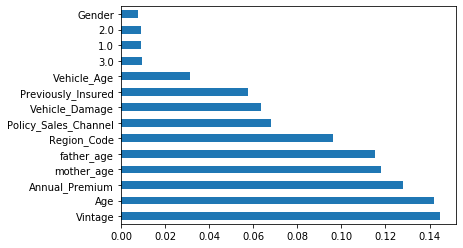

In [206]:
#feature importace
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

In [202]:
#st=pd.get_dummies(X['Vehicle_Age'],drop_first=True)
g=pd.get_dummies(X['blood_group'],drop_first=True)

In [203]:
X=X.drop(['blood_group'],axis=1)

X=pd.concat([X,g],axis=1)

In [204]:
X.describe()

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,Gender,Vehicle_Age,Vehicle_Damage,1.0,2.0,3.0
count,266776.000000,266776.000000,266776.000000,266776.000000,266776.000000,266776.000000,266776.000000,266776.000000,266776.00000,266776.000000,266776.000000,266776.000000,266776.000000,266776.000000
mean,38.852311,26.400156,0.457335,30551.832335,111.970844,154.321693,69.511643,69.506818,0.54169,0.610568,0.505705,0.249430,0.251567,0.249213
std,15.517222,13.227109,0.498177,17194.660980,54.222818,83.732094,5.770941,5.768211,0.49826,0.567209,0.499968,0.432684,0.433914,0.432558
min,20.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,60.000000,60.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,15.000000,0.000000,24406.000000,26.000000,82.000000,65.000000,64.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,28.000000,0.000000,31656.000000,128.000000,154.000000,70.000000,70.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,49.000000,35.000000,1.000000,39377.000000,152.000000,227.000000,75.000000,75.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000
max,85.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,79.000000,79.000000,1.00000,2.000000,1.000000,1.000000,1.000000,1.000000


In [207]:
#splitting of train set into training set and validation set
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [208]:
x_train.head(10)

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,Gender,Vehicle_Age,Vehicle_Damage,1.0,2.0,3.0
139772,22.0,3.0,1.0,50142.0,152.0,115.0,65.0,64.0,0.0,0.0,0.0,0,1,0
42493,24.0,46.0,1.0,23022.0,152.0,142.0,64.0,60.0,0.0,0.0,0.0,0,0,1
240158,22.0,8.0,0.0,24927.0,152.0,214.0,71.0,67.0,1.0,0.0,0.0,0,0,1
199842,49.0,3.0,1.0,31094.0,124.0,222.0,63.0,78.0,0.0,1.0,0.0,0,0,1
110852,49.0,38.0,1.0,2630.0,26.0,183.0,66.0,78.0,1.0,1.0,0.0,1,0,0
32586,38.0,15.0,0.0,27722.0,124.0,181.0,71.0,75.0,1.0,1.0,1.0,1,0,0
92087,64.0,28.0,1.0,31415.0,26.0,272.0,72.0,75.0,1.0,1.0,0.0,0,0,1
97405,65.0,20.0,0.0,2630.0,133.0,63.0,68.0,68.0,0.0,1.0,1.0,1,0,0
146726,26.0,47.0,0.0,2630.0,160.0,31.0,76.0,69.0,0.0,0.0,1.0,0,0,0
171533,56.0,8.0,0.0,38733.0,154.0,259.0,66.0,64.0,1.0,1.0,1.0,0,0,0


In [209]:
x_test.head(10)

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,Gender,Vehicle_Age,Vehicle_Damage,1.0,2.0,3.0
80105,27.0,46.0,1.0,49544.0,122.0,17.0,63.0,68.0,1.0,1.0,0.0,1,0,0
20819,35.0,28.0,0.0,57359.0,124.0,186.0,62.0,70.0,1.0,1.0,0.0,0,1,0
126985,23.0,10.0,1.0,2630.0,152.0,28.0,75.0,73.0,0.0,0.0,0.0,0,0,1
2888,25.0,35.0,1.0,30004.0,152.0,29.0,63.0,71.0,0.0,0.0,0.0,0,0,0
9969,49.0,17.0,0.0,42012.0,124.0,231.0,67.0,70.0,0.0,1.0,1.0,0,1,0
164996,24.0,8.0,1.0,2630.0,152.0,279.0,67.0,69.0,1.0,0.0,0.0,1,0,0
38772,25.0,2.0,0.0,24237.0,152.0,263.0,63.0,62.0,0.0,0.0,0.0,1,0,0
255425,24.0,29.0,1.0,36958.0,152.0,224.0,69.0,60.0,1.0,0.0,0.0,0,0,1
214191,27.0,28.0,0.0,43103.0,26.0,65.0,62.0,66.0,1.0,0.0,1.0,0,0,0
86374,25.0,15.0,0.0,25362.0,26.0,170.0,69.0,64.0,0.0,0.0,0.0,0,0,0


In [46]:
def count_ones(l):
    count=0
    for i in l:
        if(i==1):
            count+=1
    return count

In [86]:
def count_zeros(l):
    count=0
    for i in l:
        if(i==0):
            count+=1
    return count

In [142]:
array=np.array(y_train) #26089,187331 -train #ttest-6608

In [143]:
count_zeros(array)

70223

In [210]:
y_train.describe()  #122441
#print(186743-y_train.describe().freq)  #0-87.775% and 1-12.225%

count    213420.000000
mean          0.122243
std           0.327566
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: accepted, dtype: float64

In [211]:
print(y_test.describe())  #122849
#print(80033-y_test.describe().freq)   #0-87.67% and 1-12.34%

count    53356.000000
mean         0.123847
std          0.329410
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: accepted, dtype: float64


## APPLYING LOGISTIC REGRESSION

In [59]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X)
X_test_=sc_x.fit_transform(X_test_)
# x_train=sc_x.fit_transform(x_train)
# x_test=sc_x.fit_transform(x_test)

In [28]:
## Hyper Parameter Optimization for xgboost model

params={
 "C"    : [0.10, 0.2,0.50,1.0] ,
 "max_iter"        : [50,100,150,200,250],
 "intercept_scaling" : [ 1, 3, 5, 7 ],
 "penalty"            : ['l1','l2'],
 "random_state" : [ 0,42]
    
}

In [29]:
from sklearn.model_selection import GridSearchCV

In [32]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid=params,
                           n_jobs=-1,cv=5,verbose=3)

In [ ]:
grid_search = grid_search.fit(X,Y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 10.5min


In [91]:
best_accuracy

0.8774365010345758

In [92]:
best_parameters

{'C': 0.1,
 'intercept_scaling': 1,
 'max_iter': 50,
 'penalty': 'l2',
 'random_state': 0}

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.n_splits_

In [25]:
#fitting logistic regression to training data
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

# XGBCLASSIFIER

In [222]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
    "n_estimators":[100,500]
    
}

In [213]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [181]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [182]:
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [183]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)
print(accuracies.mean())
print(accuracies.std())

0.772123905724844
0.0031134917843548345


In [223]:
classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [242]:
from sklearn.model_selection import GridSearchCV
parameters = { 
    'n_estimators': [100,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10]
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid=parameters,
                           n_jobs=-1,cv=5,verbose=3)

In [224]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid=params,
                           n_jobs=-1,cv=5,verbose=3)

In [ ]:
grid_search = grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 7680 candidates, totalling 38400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 27.1min


In [244]:
print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.n_splits_)

0.8775750630545723
{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
5


In [185]:
# use the model to make predictions with the test data
from sklearn import  metrics
y_pred = classifier.predict(x_test)

# how did our model perform?

count_misclassified = (y_test != y_pred).sum()

print('Misclassified samples: {}'.format(count_misclassified))

accuracy = metrics.accuracy_score(y_test, y_pred)

print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 37833
Accuracy: 0.77


In [186]:
#data visualisation
#making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [187]:
cm
#correct predictionss=70165,incorrect predictions=9868

array([[126359,  37497],
       [   336,   1299]], dtype=int64)

#  predicting test result

In [158]:
#prediction-phase
#importing testing-dataset
testing_dataset=pd.read_csv('test.csv')

In [159]:
testing_dataset

,id,blood_group,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age
0,485035,B+,Female,21,1,8.0,0,1-2 Year,Yes,43500.0,157.0,266,64,62
1,278306,O,Male,53,1,2.0,0,1-2 Year,Yes,33547.0,26.0,119,76,79
2,478061,AB+,Female,23,1,30.0,1,< 1 Year,No,41650.0,152.0,84,61,77
3,109822,AB-,Female,46,1,28.0,0,1-2 Year,Yes,39209.0,37.0,299,70,70
4,272343,AB-,Female,30,1,28.0,0,1-2 Year,Yes,43252.0,26.0,215,73,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114328,163857,AB+,Female,20,1,35.0,1,< 1 Year,No,22475.0,160.0,101,62,78
114329,17727,AB+,Female,21,1,33.0,1,< 1 Year,No,43046.0,152.0,93,78,63
114330,29700,B+,Female,21,1,37.0,0,< 1 Year,Yes,34579.0,160.0,283,68,77
114331,154474,B+,Male,66,1,28.0,0,> 2 Years,Yes,77603.0,124.0,122,60,77


In [160]:
#number of missing values in each column
testing_dataset.isna().sum()

id                      0
blood_group             0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
mother_age              0
father_age              0
dtype: int64

In [161]:
#size of testing_dataset(number of samples,number of features)
testing_dataset.shape

(114333, 14)

In [162]:
#dropping values in testing_dataset
testing_dataset.drop(['id','blood_group'],axis=1,inplace=True)

In [163]:
#description of testing_dataset
testing_dataset.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age
count,114333.000000,114333.000000,114333.000000,114333.000000,114333.000000,114333.000000,114333.000000,114333.000000,114333.000000
mean,38.753221,0.997778,26.362328,0.460252,30593.689713,112.182345,154.407371,69.473118,69.504736
std,15.498356,0.047081,13.236390,0.498420,17256.270429,54.159997,83.529623,5.765213,5.747967
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,60.000000,60.000000
25%,25.000000,1.000000,15.000000,0.000000,24403.000000,29.000000,82.000000,64.000000,65.000000
50%,36.000000,1.000000,28.000000,0.000000,31697.000000,145.000000,154.000000,69.000000,69.000000
75%,49.000000,1.000000,35.000000,1.000000,39452.000000,152.000000,227.000000,74.000000,74.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,79.000000,79.000000


['Male', 'Female']
[61579, 52754]


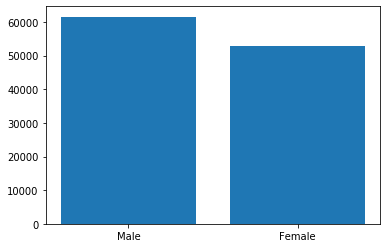

[0, 1]
[254, 114079]


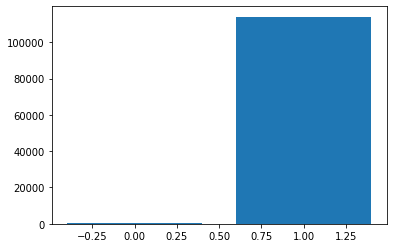

[0, 1]
[61711, 52622]


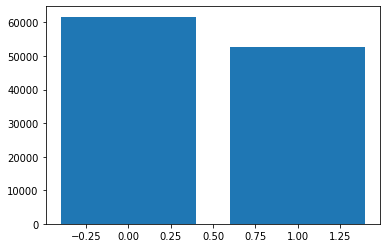

['Yes', 'No']
[57503, 56830]


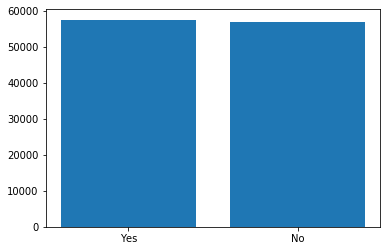

['< 1 Year', '1-2 Year', '> 2 Years']
[49697, 59827, 4809]


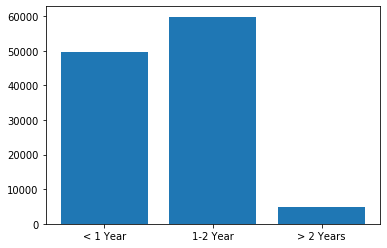

In [78]:
#plotting graph for categorical values
test_a=plot_graph(testing_dataset,'Gender',['Male','Female'])
test_b=plot_graph(testing_dataset,'Driving_License',[0,1])   #must be removed see plot-2
test_c=plot_graph(testing_dataset, 'Previously_Insured',[0,1])
test_d=plot_graph(testing_dataset, 'Vehicle_Damage',['Yes','No'])
test_e=plot_graph(testing_dataset,'Vehicle_Age',['< 1 Year', '1-2 Year', '> 2 Years'])

In [158]:
df_t

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,mother_age,father_age,Gender,blood_group,Vehicle_Age,Vehicle_Damage
0,485035.0,21.0,1.0,8.0,0.0,43500.0,157.0,266.0,64.0,62.0,0.0,0.0,0.0,0.0
1,278306.0,53.0,1.0,2.0,0.0,33547.0,26.0,119.0,76.0,79.0,1.0,1.0,0.0,0.0
2,478061.0,23.0,1.0,30.0,1.0,41650.0,152.0,84.0,61.0,77.0,0.0,2.0,1.0,1.0
3,109822.0,46.0,1.0,28.0,0.0,39209.0,37.0,299.0,70.0,70.0,0.0,3.0,0.0,0.0
4,272343.0,30.0,1.0,28.0,0.0,43252.0,26.0,215.0,73.0,62.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114328,163857.0,20.0,1.0,35.0,1.0,22475.0,160.0,101.0,62.0,78.0,0.0,2.0,1.0,1.0
114329,17727.0,21.0,1.0,33.0,1.0,43046.0,152.0,93.0,78.0,63.0,0.0,2.0,1.0,1.0
114330,29700.0,21.0,1.0,37.0,0.0,34579.0,160.0,283.0,68.0,77.0,0.0,0.0,1.0,0.0
114331,154474.0,66.0,1.0,28.0,0.0,77603.0,124.0,122.0,60.0,77.0,1.0,0.0,2.0,0.0


In [167]:
#importing features and labels from testing_dataset

X_test_=df_t.iloc[:,[1,3,4,5,6,7,10,11,12,13]]

In [188]:
X_test_

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender,Vehicle_Damage,1.0,2.0,3.0,1.0,2.0
0,21.0,8.0,0.0,43500.0,157.0,266.0,0.0,0.0,0,0,0,0,0
1,53.0,2.0,0.0,33547.0,26.0,119.0,1.0,0.0,1,0,0,0,0
2,23.0,30.0,1.0,41650.0,152.0,84.0,0.0,1.0,0,1,0,1,0
3,46.0,28.0,0.0,39209.0,37.0,299.0,0.0,0.0,0,0,1,0,0
4,30.0,28.0,0.0,43252.0,26.0,215.0,0.0,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114328,20.0,35.0,1.0,22475.0,160.0,101.0,0.0,1.0,0,1,0,1,0
114329,21.0,33.0,1.0,43046.0,152.0,93.0,0.0,1.0,0,1,0,1,0
114330,21.0,37.0,0.0,34579.0,160.0,283.0,0.0,0.0,0,0,0,1,0
114331,66.0,28.0,0.0,77603.0,124.0,122.0,1.0,0.0,0,0,0,0,1


In [169]:
#creating new coluumns for categorical features
ut=pd.get_dummies(X_test_['Vehicle_Age'],drop_first=True)
gt=pd.get_dummies(X_test_['blood_group'],drop_first=True)
X_test_=X_test_.drop(['Vehicle_Age','blood_group'],axis=1)

X_test_=pd.concat([X_test_,gt,ut],axis=1)

In [170]:
X_test_.describe()

,Age,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender,Vehicle_Damage,1.0,2.0,3.0,1.0,2.0
count,114333.000000,114333.000000,114333.000000,114333.000000,114333.000000,114333.000000,114333.000000,114333.000000,114333.000000,114333.000000,114333.00000,114333.000000,114333.000000
mean,38.753221,26.362328,0.460252,30593.689713,112.182345,154.407371,0.538593,0.497057,0.251598,0.250147,0.24796,0.434669,0.042061
std,15.498356,13.236390,0.498420,17256.270429,54.159997,83.529623,0.498511,0.499994,0.433934,0.433099,0.43183,0.495716,0.200730
min,20.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,25.000000,15.000000,0.000000,24403.000000,29.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,36.000000,28.000000,0.000000,31697.000000,145.000000,154.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,49.000000,35.000000,1.000000,39452.000000,152.000000,227.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,0.000000
max,85.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
